In [1]:
# k-nearest neighbours
import mglearn
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# simple usage
# loading dataset and splitting data
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
# create classifier defining number of neighbours to consider
clf = KNeighborsClassifier(n_neighbors=3)

In [4]:
# fit classifier using the data
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
print("Predictions on dataset: {}".format(clf.predict(X_test)))
print("Accuracy in the test set: {:.2f}".format(clf.score(X_test, y_test)))

Predictions on dataset: [1 0 1 0 1 0 0]
Accuracy in the test set: 0.86


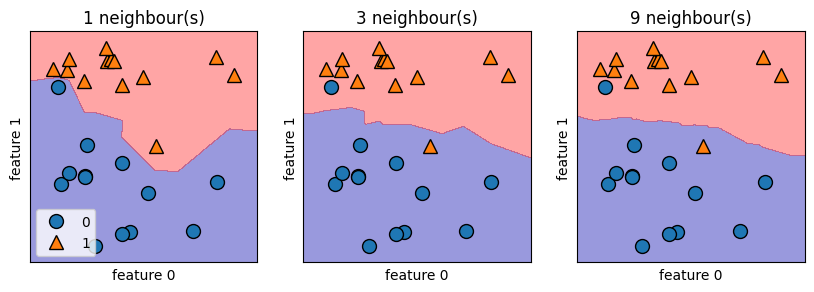

In [8]:
# visualise results for different numbers of neighbours 
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit() returns object self 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbour(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

In [9]:
# compare accuracy of different number of neighbours for breast cancer dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [10]:
training_accuracy = []
test_accuracy = []
# test neighbours in range 1 to 10
neighbours_settings = range(1, 11)

for n_neighbours in neighbours_settings:
    # build model
    clf = KNeighborsClassifier(n_neighbors=n_neighbours)
    clf.fit(X_train, y_train)
    # save accuracy of learn dataset
    training_accuracy.append(clf.score(X_train, y_train))
    # save accuracy of test dataset
    test_accuracy.append(clf.score(X_test, y_test))

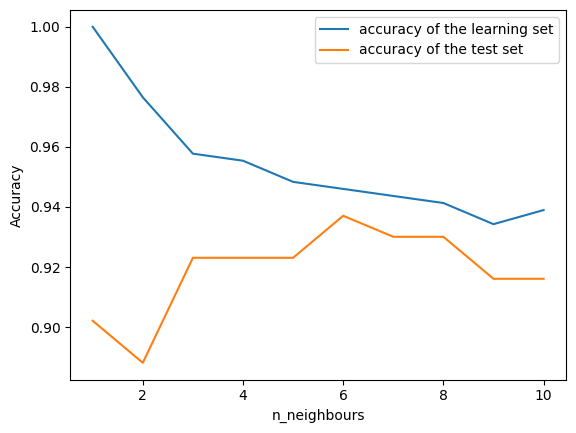

In [13]:
plt.plot(neighbours_settings, training_accuracy, label="accuracy of the learning set")
plt.plot(neighbours_settings, test_accuracy, label="accuracy of the test set")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.legend()
plt.show()